In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [2]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


house_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [3]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [4]:
house_df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
cat = house_df.select_dtypes(['object']).columns

print(cat)
print(len(cat))

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')
43


In [6]:
num = house_df.select_dtypes(['int64', 'float64']).columns

print(num)
print(len(num))

Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch',
       'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')
38


## Dealing with missing data

In [7]:
total_missing = house_df.isnull().sum().sort_values(ascending=False)
percent_missing = (house_df.isnull().sum()/house_df.isnull().count()).sort_values(ascending=False)

missing = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing.head(20)

,Total,Percent
poolqc,1453,0.995205
miscfeature,1406,0.963014
alley,1369,0.937671
fence,1179,0.807534
fireplacequ,690,0.472603
lotfrontage,259,0.177397
garagecond,81,0.055479
garagetype,81,0.055479
garageyrblt,81,0.055479
garagefinish,81,0.055479


There are 19 variables have missing values from 99.5% missing to 0.001 missing. Since there are so many variables, I decided not to use these 19 variables in the model. 

## EDA

First, examine the distribution of the target variable saleprice and it is positively skewed.

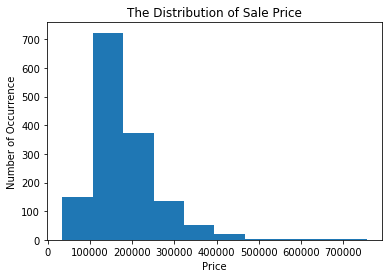

In [8]:
#first, examine the distribution of target variable
#Hobson: why these two plots are different on the y-axis? 
#sns.distplot(house['saleprice'], kde=False)
plt.hist(house_df['saleprice'])
plt.title('The Distribution of Sale Price')
plt.xlabel('Price')
plt.ylabel('Number of Occurrence')
plt.show()

Examine correlations between numeric variables and target variable regardless of signs by taking absolute values.

In [9]:
np.abs(house_df[num].iloc[:,1:].corr().loc[:,'saleprice']).sort_values(ascending=False)

saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
firstflrsf       0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
garageyrblt      0.486362
masvnrarea       0.477493
fireplaces       0.466929
bsmtfinsf1       0.386420
lotfrontage      0.351799
wooddecksf       0.324413
secondflrsf      0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
kitchenabvgr     0.135907
enclosedporch    0.128578
screenporch      0.111447
poolarea         0.092404
mssubclass       0.084284
overallcond      0.077856
mosold           0.046432
threessnporch    0.044584
yrsold           0.028923
lowqualfinsf     0.025606
miscval          0.021190
bsmthalfbath     0.016844
bsmtfinsf2       0.011378
Name: saleprice, dtype: float64

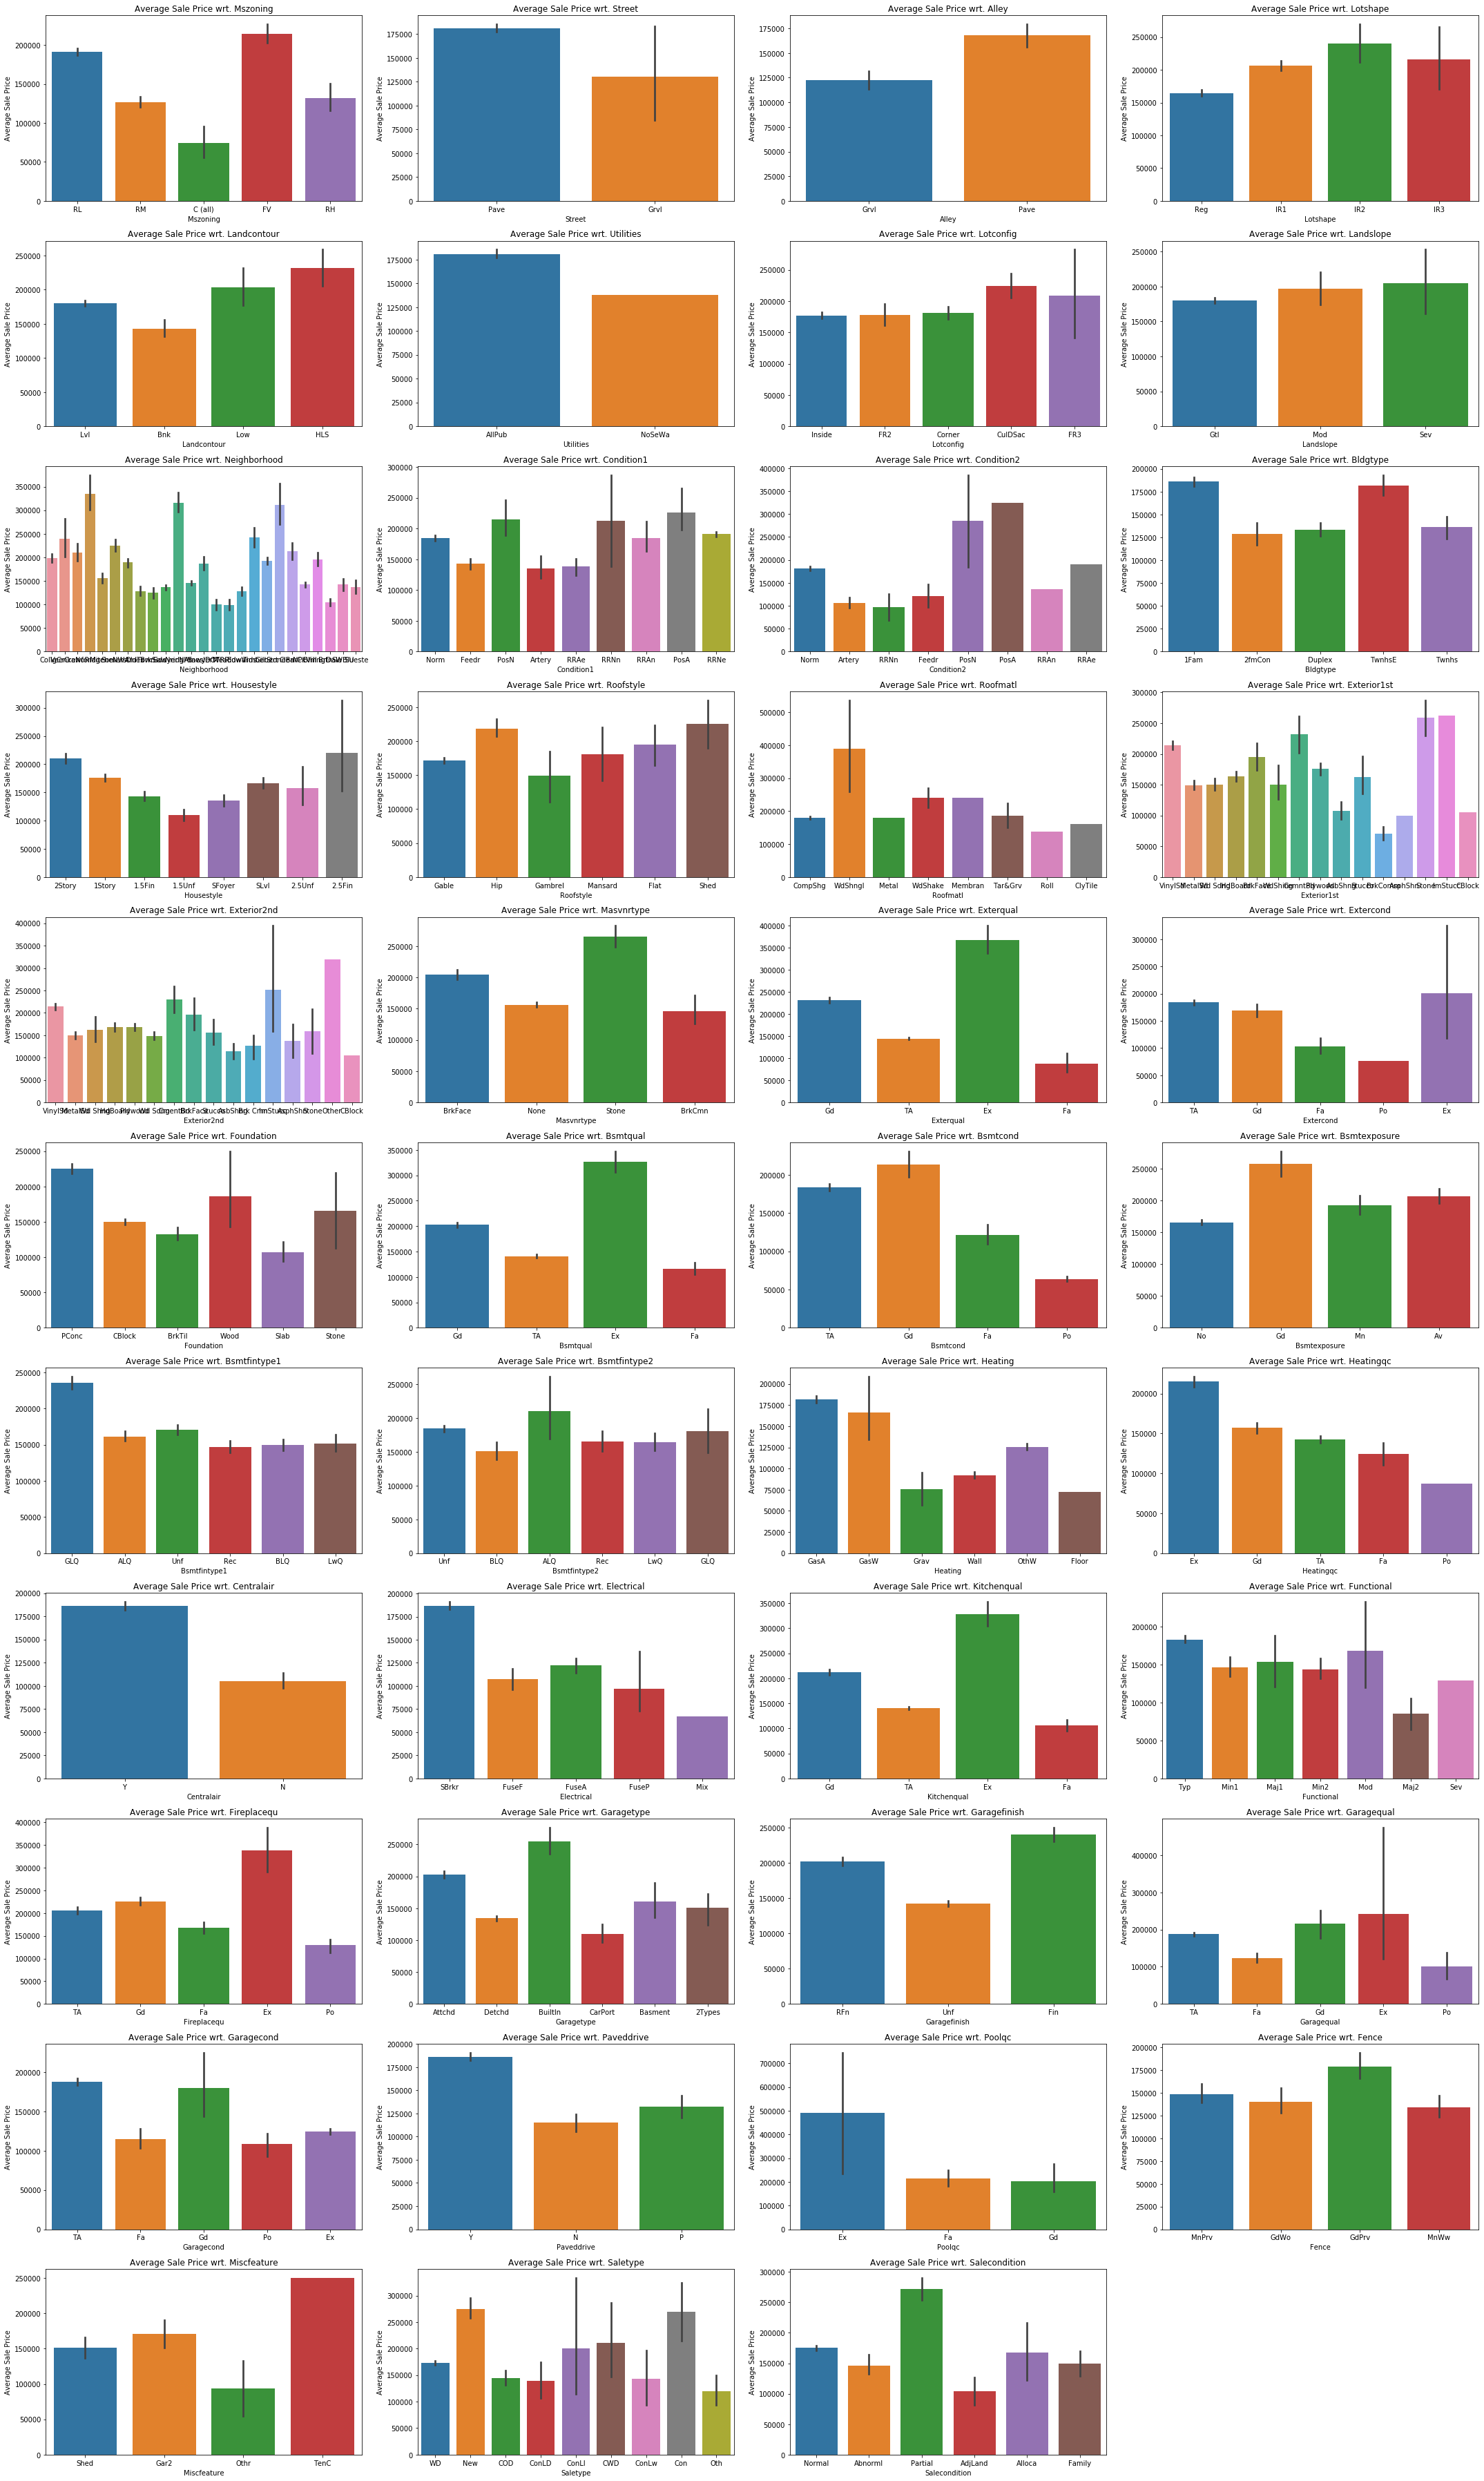

In [10]:
#plot sale price by categorical variables 
plt.figure(figsize=(30,50))

for i in range(len(cat)):
    plt.subplot(11,4,i+1)
    sns.barplot(x=cat[i], y='saleprice', data=house_df)
    plt.title('Average Sale Price wrt. {}'.format(cat[i].capitalize()))
    plt.ylabel('Average Sale Price')
    plt.xlabel('{}'.format(cat[i].capitalize()))

plt.tight_layout()
plt.show()

I chose 10 variables that have relative high correlation with saleprice >=0.50. Also added categorical variables mszoning, street, and exterqual to the model where I saw variance between groups. 

In [11]:
subcat = ['mszoning', 'street', 'exterqual']

In [12]:
list(pd.get_dummies(house_df['mszoning'], prefix='mszoning', drop_first=True).columns)

['mszoning_FV', 'mszoning_RH', 'mszoning_RL', 'mszoning_RM']

In [13]:
#convert categorical variable to dummies 

for i in subcat:
    dummy_column_names = []
    house_df = pd.concat([house_df,
                         pd.get_dummies(house_df[i], prefix=i, drop_first=True)], axis=1
     
                        )
#Hobson: why this line doesn't work? 
    #dummy_column_names.append(list(pd.get_dummies(house_df[i], prefix=i, drop_first=True).columns))
                              
house_df.head()
#dummy_column_names

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,salecondition,saleprice,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,exterqual_Fa,exterqual_Gd,exterqual_TA
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,Normal,208500,0,0,1,0,1,0,1,0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,Normal,181500,0,0,1,0,1,0,0,1
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,Normal,223500,0,0,1,0,1,0,1,0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,Abnorml,140000,0,0,1,0,1,0,0,1
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,Normal,250000,0,0,1,0,1,0,1,0


In [14]:
cat_column_names = list(house_df.columns[-8:])
cat_column_names

['mszoning_FV',
 'mszoning_RH',
 'mszoning_RL',
 'mszoning_RM',
 'street_Pave',
 'exterqual_Fa',
 'exterqual_Gd',
 'exterqual_TA']

In [15]:
#examine correlations between numeric variables and target variable 
def half_masked_corr_heatmap(dataframe, title=None, file=None):
    plt.figure(figsize=(20,20))
    sns.set(font_scale=1)
    
    mask = np.zeros_like(dataframe.corr())
    mask [np.triu_indices_from(mask)] = True
    
    with sns.axes_style("white"):
        sns.heatmap(dataframe.corr().round(2), mask=mask, annot=True)
        
    if title: plt.title(f'\n{title}\n', fontsize=18)
    plt.xlabel('')
    plt.ylabel('')
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    
    return 

In [16]:
#half_masked_corr_heatmap(house_num,
                         #"Correlation Matrix")

## Regression Model

In [17]:
Y = house_df['saleprice']

X = house_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'firstflrsf',
              'fullbath', 'totrmsabvgrd', 'yearbuilt', 'yearremodadd'] + cat_column_names]

X.head()

,overallqual,grlivarea,garagecars,garagearea,totalbsmtsf,firstflrsf,fullbath,totrmsabvgrd,yearbuilt,yearremodadd,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,exterqual_Fa,exterqual_Gd,exterqual_TA
0,7,1710,2,548,856,856,2,8,2003,2003,0,0,1,0,1,0,1,0
1,6,1262,2,460,1262,1262,2,6,1976,1976,0,0,1,0,1,0,0,1
2,7,1786,2,608,920,920,2,6,2001,2002,0,0,1,0,1,0,1,0
3,7,1717,3,642,756,961,1,7,1915,1970,0,0,1,0,1,0,0,1
4,8,2198,3,836,1145,1145,2,9,2000,2000,0,0,1,0,1,0,1,0


In [20]:
import statsmodels.api as sm

X = sm.add_constant(X)

lin_reg = sm.OLS(Y, X).fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     309.5
Date:                Fri, 04 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:38:09   Log-Likelihood:                -17389.
No. Observations:                1460   AIC:                         3.482e+04
Df Residuals:                    1441   BIC:                         3.492e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.281e+05   1.39e+05     -5.961      0.000    -1.1e+06   -5.56e+05
overallqual   1.637e+04   1237.233     13.234      0.000    1.39e+04    1.88e+04
grlivarea       53.8024      4.077     13.198      0.000      45.806      61.799
garagecars    1.206e+04   2936.522      4.107      0.000    6300.127    1.78e+04
garagearea       8.8562      9.975      0.888      0.375     -10.710      28.423
totalbsmtsf     16.9508      4.128      4.106      0.000       8.852      25.049
firstflrsf       7.0145      4.825      1.454      0.146      -2.450      16.479
fullbath     -5485.6729   2587.432     -2.120      0.034   -1.06e+04    -410.136
totrmsabvgrd -1431.8145   1089.432     -1.314      0.189   -3568.857     705.228
yearbuilt      150.9792     52.626      2.869      0.004      47.747     254.211
yearremodadd   267.7773     62.954      4.254      0.000     144.286     391.268
mszoning_FV   2.112e+04   1.33e+04      1.589      0.112   -4957.174    4.72e+04
mszoning_RH   1.709e+04   1.51e+04      1.134      0.257   -1.25e+04    4.67e+04
mszoning_RL   3.003e+04   1.23e+04      2.436      0.015    5844.690    5.42e+04
mszoning_RM   1.283e+04   1.24e+04      1.037      0.300   -1.14e+04    3.71e+04
street_Pave    494.6105   1.61e+04      0.031      0.975   -3.11e+04    3.21e+04
exterqual_Fa -5.767e+04   1.29e+04     -4.457      0.000   -8.31e+04   -3.23e+04
exterqual_Gd   -5.8e+04   5716.585    -10.146      0.000   -6.92e+04   -4.68e+04
exterqual_TA -6.831e+04   6487.488    -10.530      0.000    -8.1e+04   -5.56e+04
==============================================================================
Omnibus:                      644.161   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            92540.270
Skew:                          -0.988   Prob(JB):                         0.00
Kurtosis:                      41.953   Cond. No.                     5.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Assignment 22.3: check assumptions

## Assumption 1: linearity of the model in its coefficients

To detect nonlinearity, inspect plots of observed vs. predicted values or residuals vs. predicted values. The desired outcome is that points are symmetrically distributed around a diagonal line in the former plot or around a horizontal line in the latter one. In both cases with a roughly constant variance. 

The inspection of the plots shows that the linearity assumption is roughly satisfied.

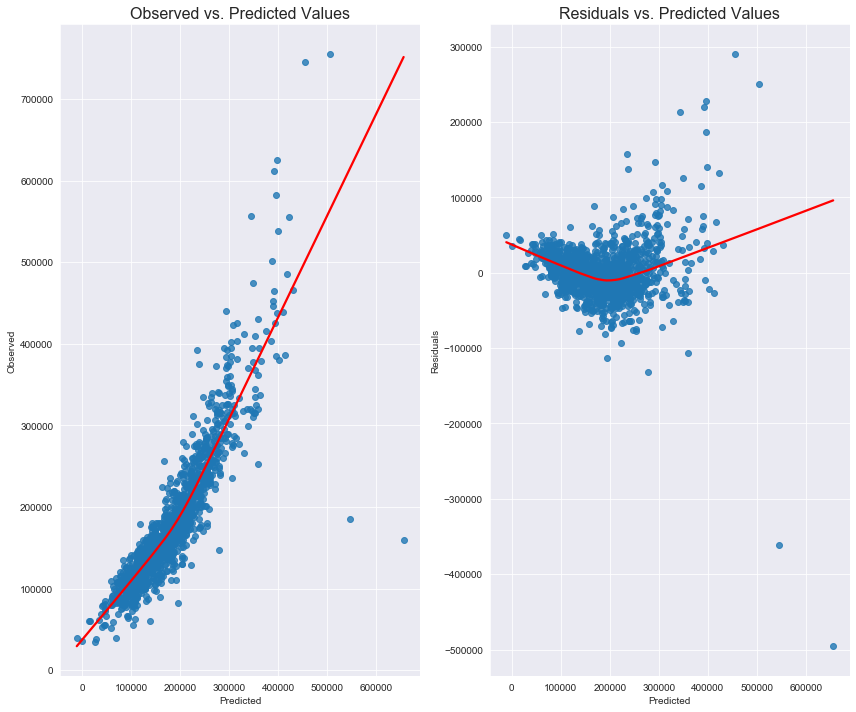

In [21]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,10))

fitted_vals = lin_reg.predict()
resids = lin_reg.resid

plt.subplot(1,2,1)
sns.regplot(x=fitted_vals, y=Y, lowess=True, line_kws={'color': 'red'})
plt.title ('Observed vs. Predicted Values', fontsize=16)
plt.xlabel('Predicted')
plt.ylabel('Observed')

plt.subplot(1,2,2)
sns.regplot(x=fitted_vals, y=resids, lowess=True, line_kws={'color': 'red'})
plt.title ('Residuals vs. Predicted Values', fontsize=16)
plt.xlabel('Predicted')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

## Assumption 2: the error term should be zero on average 

This assumption is met.

In [22]:
print("Mean of the errors in the weather forcast model is: {}".format(lin_reg.resid.mean()))

Mean of the errors in the weather forcast model is: -5.405667725924964e-09


## Assumption 3: homoscedasticity

Use plot and tests to check. The test results reject the null hypothesis indicating the errors are heteroscedastic. This may be caused by outliers in the data and omitted variables that are important in explaining the variance of the target variable. 

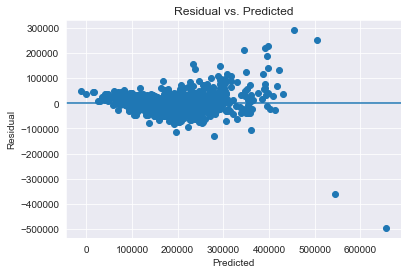

In [23]:
plt.scatter(fitted_vals, resids)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [24]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(fitted_vals, resids)
lev_stats = levene(fitted_vals, resids)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 621.426 and p value is 3.66e-137
Levene test statistic value is 548.577 and p value is 2.59e-111


## Assumption 4: low multicollinearity

Detect multicollinearity using the variance inflation factor(VIF). If no features are correlated, then all values for VIF will be 1. As we can see from the results, many features are correlated. Multicollinearity can be fixed by PCA or by discarding some of the correlated features.

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

,VIF,features
0,21461.7,const
1,3.3,overallqual
2,5.1,grlivarea
3,5.4,garagecars
4,5.1,garagearea
5,3.6,totalbsmtsf
6,3.9,firstflrsf
7,2.3,fullbath
8,3.5,totrmsabvgrd
9,2.8,yearbuilt


## Assumption 5: error terms should be uncorrelated with one another

As we can see from the plots, errors are uncorrelated with each other. The autocorrelation between the errors is indeed very low, ranging between -0.06 and 0.06. 

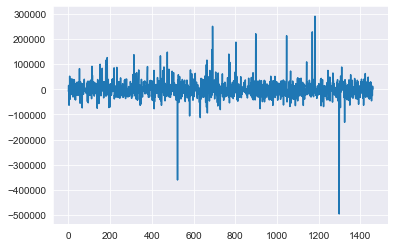

In [26]:
plt.plot(resids)
plt.show()

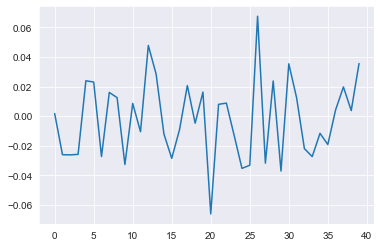

In [27]:
from statsmodels.tsa.stattools import acf

acf_data = acf(resids)

plt.plot(acf_data[1:])
plt.show()

## Assumption 6: features shouldn't be correlated with the errors

To investigate this assumption I check the Pearson correlation coefficient between each feature and the residuals. Then report the p-value for testing the lack of correlation between the two considered series. All null hypothese cannot be rejected.

Violations of the exogeneity assumption may have several sources. Common causes are omitted variables and simultaneous causation between independent variables and the target.

In [28]:
from scipy.stats.stats import pearsonr

for column in X.columns:
    corr_test = pearsonr(X[column], lin_reg.resid)
    print(f'Variable: {column} --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')

Variable: const --- correlation: nan, p-value: nan
Variable: overallqual --- correlation: -0.0000, p-value: 1.0000
Variable: grlivarea --- correlation: -0.0000, p-value: 1.0000
Variable: garagecars --- correlation: -0.0000, p-value: 1.0000
Variable: garagearea --- correlation: -0.0000, p-value: 1.0000
Variable: totalbsmtsf --- correlation: -0.0000, p-value: 1.0000
Variable: firstflrsf --- correlation: -0.0000, p-value: 1.0000
Variable: fullbath --- correlation: -0.0000, p-value: 1.0000
Variable: totrmsabvgrd --- correlation: -0.0000, p-value: 1.0000
Variable: yearbuilt --- correlation: -0.0000, p-value: 1.0000
Variable: yearremodadd --- correlation: -0.0000, p-value: 1.0000
Variable: mszoning_FV --- correlation: 0.0000, p-value: 1.0000
Variable: mszoning_RH --- correlation: -0.0000, p-value: 1.0000
Variable: mszoning_RL --- correlation: -0.0000, p-value: 1.0000
Variable: mszoning_RM --- correlation: 0.0000, p-value: 1.0000
Variable: street_Pave --- correlation: -0.0000, p-value: 1.0000